## 3.3.1　k近傍法

正規分布

ガンマ分布

　データ Dに確率分布$p(x)$を当てはめ、典型的には負の対数尤度$ -\ln p(x') $が大きい場合に異常として判定

以下 侍エンジニア塾のフクロウさんの実装 CODEをコピーしています．

  https://www.sejuku.net/blog/60630


In [27]:
import seaborn as sns
 
iris = sns.load_dataset("iris") 
# ちなみにこのirisはpandasのdataframeです。
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


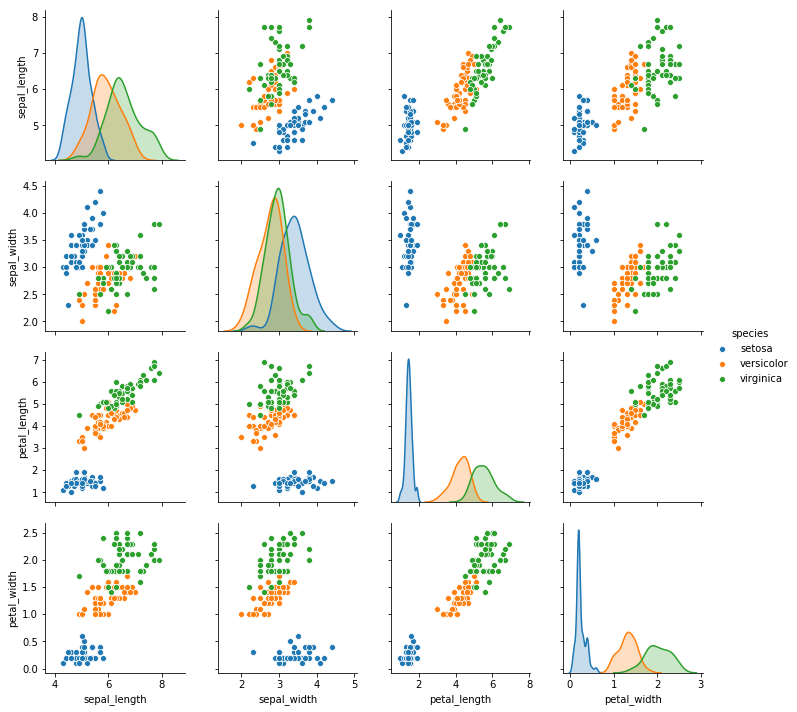

In [28]:
sns.pairplot(iris, hue = "species", diag_kind="kde")

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=30, init="random", n_jobs=-1)

In [30]:
cluster = kmeans.fit_predict(iris.values[:,0:4])

In [31]:
iris2 = iris.iloc[:,[0,1,2,3]]
iris2["cluster"] = ["cluster"+str(x) for x in cluster]
 
iris2.head(20)

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,cluster2
1,4.9,3.0,1.4,0.2,cluster2
2,4.7,3.2,1.3,0.2,cluster2
3,4.6,3.1,1.5,0.2,cluster2
4,5.0,3.6,1.4,0.2,cluster2
5,5.4,3.9,1.7,0.4,cluster2
6,4.6,3.4,1.4,0.3,cluster2
7,5.0,3.4,1.5,0.2,cluster2
8,4.4,2.9,1.4,0.2,cluster2
9,4.9,3.1,1.5,0.1,cluster2


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


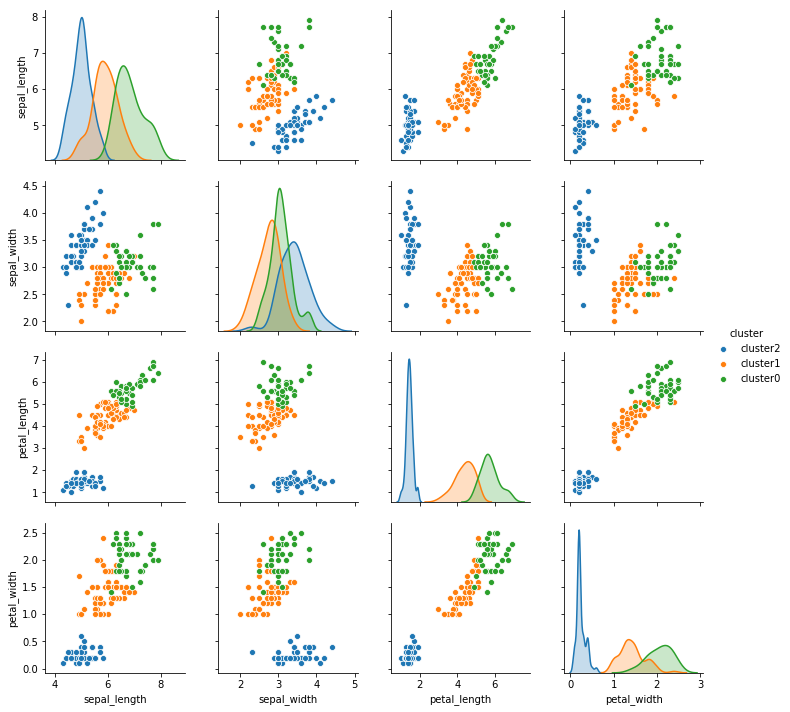

In [32]:
sns.pairplot(iris2, hue = "cluster", diag_kind="kde")

以下 侍エンジニア塾のフクロウさんの実装 CODEをコピーしています．

https://www.sejuku.net/blog/64355

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets       # Datasets 読み込み用

from collections import Counter    # リストのようなデータ形式の中の要素の数え上げを行う機能

In [34]:
iris = datasets.load_iris()

df = pd.DataFrame(
    iris.data,
    columns = iris.feature_names
)

df["label"] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
# dataセットのシャッフルを行うsample関数を使って100%ランダム化 frac=1, 
# frac=0.1とすると10％サンプリング．ランダマイズしたあとにIndexをリセットしなおす．
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,6.9,3.1,5.4,2.1,2
1,6.3,2.8,5.1,1.5,2
2,6.8,2.8,4.8,1.4,1
3,5.5,2.6,4.4,1.2,1
4,7.7,3.0,6.1,2.3,2


In [36]:
# 150 データを　半分（75づつ）に分けてtrain データ、Testデータに分類

train_size = 75
train_data = df.iloc[:train_size].values
test_data = df.iloc[train_size:].values

In [37]:
def knn(k, train_data, test_data):
    labels=[]
    
    for test in test_data:
        
        # 1. すべてのトレインデータとtest（このループステップでラベルを予測したいデータ）との距離を計算したリストを作る
        distances = np.sum((train_data[:,:-1]-test[:-1])**2, axis=1)
        
        # 2. 距離リストの値が小さい順に並べた、トレインデータのインデックスを持つリストを作る
        sorted_train_indexes = np.argsort(distances)
        # np.argsortは普通にソートした後、各要素のindexが入った配列を返します
        
        # 3. インデックスリストを元に、testから近いk個のトレインデータのラベルを取り出す
        sorted_k_labels = train_data[sorted_train_indexes, -1][:k]
        
        # 4. sorted_k_labelsの中で最も数の多かったlabelを取り出す
        # Counterのmost_common メソッド (要素、出現回数)というタプルを出現回数順に並べた
        # Listを返す Counter.most_common()[0][0]で最も出現回数が多いもの
        label = Counter(sorted_k_labels).most_common()[0][0]
                
        labels.append(label)
        
    return labels

In [38]:
pred_labels = knn(5, train_data, test_data)

In [39]:
test_data[:,-1]

array([2., 1., 1., 2., 2., 1., 1., 2., 0., 1., 2., 2., 2., 2., 0., 0., 1.,
       0., 2., 2., 0., 1., 2., 2., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 2., 0., 1., 1., 0., 2., 1., 2., 1., 0., 1., 0., 2., 0.,
       0., 2., 0., 2., 0., 2., 1., 1., 2., 2., 2., 0., 1., 1., 0., 0., 1.,
       2., 2., 1., 1., 0., 2., 1.])

In [40]:
np.sum(pred_labels == test_data[:,-1]) / len(test_data)

1.0

In [41]:
test_df = df.iloc[train_size:].copy()
test_df["pred_label"] = pred_labels
test_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,pred_label
75,6.3,3.3,6.0,2.5,2,2.0
76,7.0,3.2,4.7,1.4,1,1.0
77,5.7,2.6,3.5,1.0,1,1.0
78,7.6,3.0,6.6,2.1,2,2.0
79,7.3,2.9,6.3,1.8,2,2.0


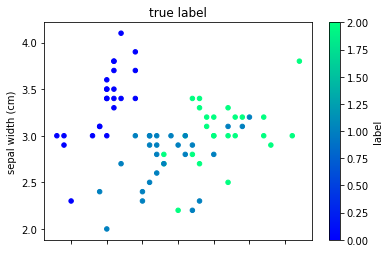

In [42]:
test_df.plot(kind="scatter", x=0,y=1,c="label", cmap="winter")
plt.title("true label")
plt.show()

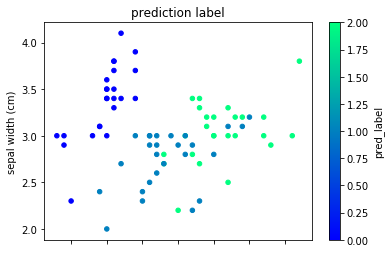

In [43]:
test_df.plot(kind="scatter", x=0,y=1,c="pred_label", cmap="winter")
plt.title("prediction label")
plt.show()

### Scikit-learn ではどのように紹介されているか？ 1.6.1.1. Finding the Nearest Neighbors 

In [44]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices                                           

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

In [45]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

In [46]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

#  できるかどうかやってみる


ちょっとだけ計算してみる

(array([ 4.91864289,  1.46663254,  6.50121288,  4.8537838 ,  3.84940801,
         3.56816228,  6.41539267,  1.90230977,  8.63849487,  3.33411917,
         7.98683008,  6.91268165,  2.55842902,  5.54954561,  4.26119317,
         3.86485491,  3.77686759,  3.75130938,  2.0278489 ,  3.46007106,
         2.25118498,  2.81696376,  2.34762883,  6.20050025,  6.04314994,
         5.06285031,  4.5328368 ,  4.88117192,  5.87300418,  3.20757594,
         2.1844723 ,  2.00116871,  5.52099805,  5.20349151,  4.59097392,
         9.52524581,  5.26072484,  7.0493805 ,  4.09190117,  6.14950245,
         3.46423792,  3.61975194,  7.43029842,  8.04860917,  6.92236536,
         5.05445006,  4.63283539,  3.83554822,  4.0190872 ,  6.19502083,
         5.13290004,  5.58401547,  4.59480051,  4.51476061,  7.14295174,
         0.981024  ,  5.32679523,  3.48506065,  6.74008834,  1.09916008,
         2.73527204,  5.91394185,  8.92579305,  4.01778339,  2.17511698,
         3.98178436,  4.62369974,  1.64897752,  3.8

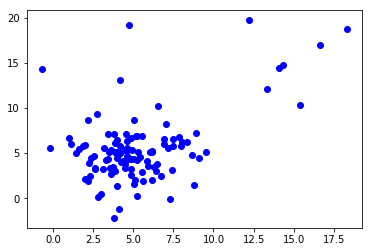

In [65]:
#正常なデータ
x0 = np.random.normal(loc=5, scale=2, size=100)
y0 = np.random.normal(loc=5, scale=2, size=100)

#異常なデータ
x1 = np.random.normal(loc=13, scale=5, size=10)
y1 = np.random.normal(loc=13, scale=5, size=10)


x = np.append(x0,x1,axis=0)
y = np.append(y0,y1,axis=0)

plt.plot(x,y,"bo")

x, y

In [66]:
def knn2d(x, y, k):
    num = x.shape[0]
    ipsilon_list = []
    for j in range(num):
        l_list = [] #k番目のデータに対するその他のデータの距離
        for i in range(num):
            xl = x[i] - x[j]
            yl = y[i] - y[j]
            l2 = (xl) ** 2 + (yl) ** 2
            l = l2 ** 0.5
            l_list.append(l)
        l_li = np.array(l_list)
        l_li = np.sort(l_li)
        ipsilon_list.append(l_li[k])# k番目の距離をipsilon Listに加えた．
    abnormals = np.array(ipsilon_list)

    return abnormals

xj, yj からk番目に近い点までの距離イプシロンを
すべての組あわせで計算する．
この距離がある値より大きければ異常と判断することになる．

In [67]:
abnormals = knn2d(x,y,4)
abnormals.shape

(110,)

In [68]:
def abnormal_decision(abnormals, treshold):
    result_list = []
    num = abnormals.shape[0]
    for i in range(num):
        abnormal = abnormals[i]
        if abnormal > treshold:
            result_list.append(i)
    return result_list

thresholdよりも大きな値をとるときは異常と判断する．
次の場合、threshold=2として計算している

In [69]:
anomaly_list = abnormal_decision(abnormals, 2.5)
anomaly_list

[16, 72, 73, 92, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


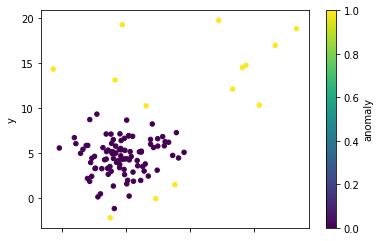

In [70]:
anomaly_table = pd.DataFrame()
anomaly_table["x"] = x
anomaly_table["y"] = y
anomaly_table["anomaly"] = 0

for n in anomaly_list:
    anomaly_table["anomaly"][n] = 1

anomaly_table
    
anomaly_table.plot.scatter(x="x",y="y",c="anomaly",colormap="viridis")

## 3.3.2 局所外れ値度 

In [ ]:
データの分布する領域に濃淡がある場合、最適なkを一つ決めることが難しい．

k=1の場合の局所外れ値度 LOF: local outlier fator

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)

# Generate train data
X = 0.3 * np.random.randn(100, 2)
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X + 2, X - 2, X_outliers]

# fit the model
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X)
# 正常を1、異常を-1と出力するようです
ANOMALY_DATA = -1
predicted_outlier_index = np.where(y_pred == ANOMALY_DATA)
predicted_outlier = X[predicted_outlier_index]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


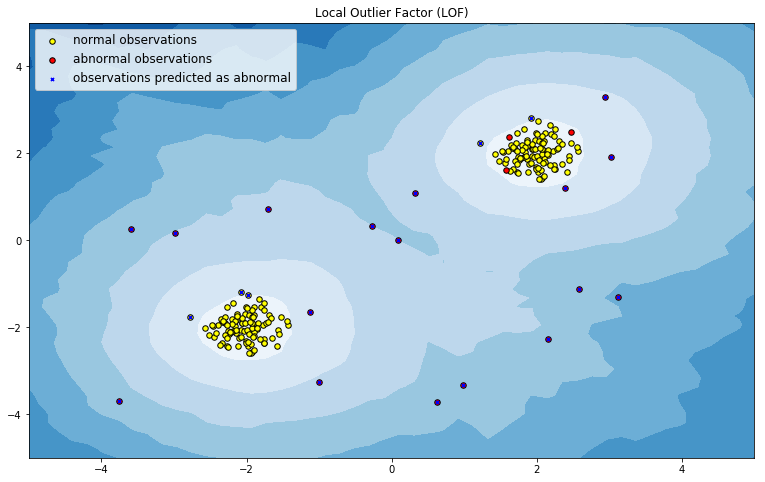

In [74]:

# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(13, 8))

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X[:200, 0], X[:200, 1], c='yellow',
                edgecolor='k', s=30, marker='o')
b = plt.scatter(X[200:, 0], X[200:, 1], c='red',
                edgecolor='k', s=30, marker='o')
c = plt.scatter(predicted_outlier[:, 0], predicted_outlier[:, 1], c='blue',
                edgecolor='k', s=10, marker='x')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b, c],
           ["normal observations",
            "abnormal observations",
            "observations predicted as abnormal"],
           loc="upper left", prop={'size': 12})
plt.show()

## アヤメデータを用いて　やってみよう

In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, metrics

iris = datasets.load_iris() # 4次元、150サンプルのデータセットで
                            # 植物の萼（がく）の長さ、幅、 花びらの長さ、幅、単位はcm。
iris_X = iris.data[:, :2]  # 4次元のうち、最初の2次元の特徴量だけを使用
iris_y = iris.target # 正解ラベル, 0, 1, 2の3種類

In [90]:
np.random.seed(0) # 乱数のシード設定、0じゃなくてもなんでもいい
indices = np.random.permutation(len(iris_X)) # 0~149の数字をランダムに並び替え

# 150個のデータセットを115個の教師データと35個のテストデータに分ける
iris_X_train = iris_X[indices[:-35]]
iris_y_train = iris_y[indices[:-35]]
iris_X_test = iris_X[indices[-35:]]
iris_y_test = iris_y[indices[-35:]]

In [91]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
#変数の設定

In [92]:
h = 0.1 # メッシュサイズ
k_list = [1, 5, 10, 30] # k の数
weights_list =['uniform', 'distance']
score = np.zeros((len(k_list)*2,5)) # score

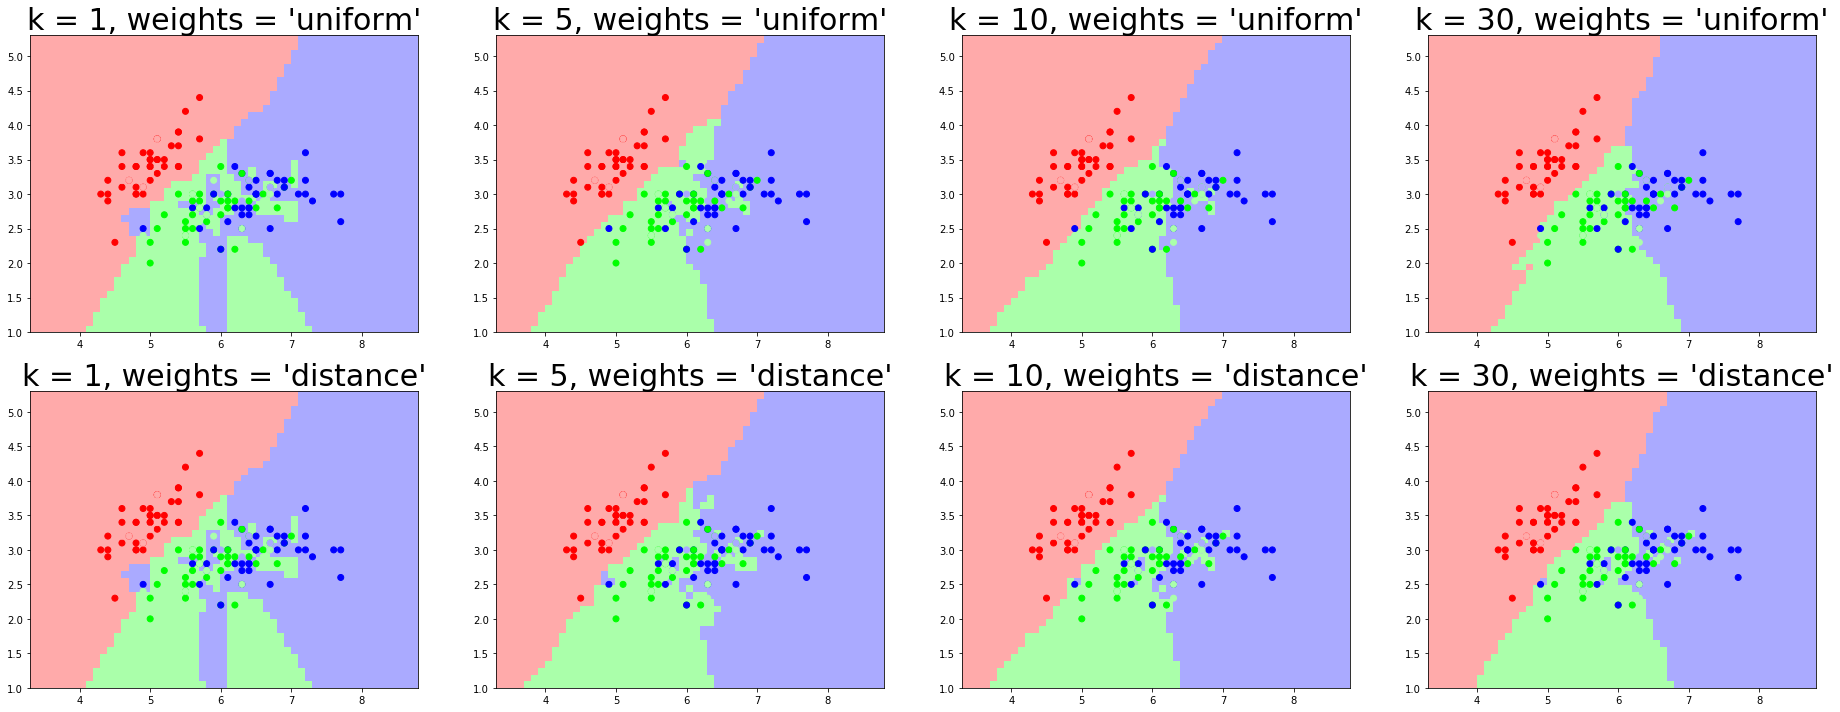

In [97]:
plt.figure(figsize=(8*len(k_list), 12))

i = 1 # subplot用

for weights in weights_list:
    for k in k_list:
        
        clf = neighbors.KNeighborsClassifier(k, weights=weights)
        
        clf.fit(iris_X_train, iris_y_train)  # trainデータによる学習
        
        x1_min, x1_max = iris_X[:, 0].min() - 1, iris_X[:, 0].max() + 1 # Xの1次元目の最小と最大を取得
        x2_min, x2_max = iris_X[:, 1].min() - 1, iris_X[:, 1].max() + 1 # Xの2次元目の最小と最大を取得
        
        # x1_min から x1_max まで、x2_min から x2_max までの h 刻みの等間隔な格子状配列を生成
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
        
        # メッシュ状の各点に対して予測 / .ravel()で一次元配列に変換し、np.c_[]でxx1, xx2をxx2ごとに合体
        Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape) # 配列形式変更        
        
        plt.subplot(2,len(k_list),i) # 2行 × k_list列のグラフのi番目のグラフに
        plt.pcolormesh(xx1, xx2, Z, cmap=cmap_light) # 学習結果をプロット
        
        plt.scatter(iris_X_train[:, 0], iris_X_train[:, 1], c=iris_y_train, cmap=cmap_bold) # 教師データをプロット
        plt.scatter(iris_X_test[:, 0], iris_X_test[:, 1], c=iris_y_test, cmap=cmap_light) # テストデータをプロット
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        plt.title("k = %i, weights = '%s'" % (k, weights), fontsize=30)
        score[i-1,3] = k
        score[i-1,0] = metrics.f1_score(iris_y_test, clf.predict(iris_X_test), average='weighted')
        score[i-1,1] = metrics.precision_score(iris_y_test, clf.predict(iris_X_test),average='weighted')
        score[i-1,2] = metrics.recall_score(iris_y_test,clf.predict(iris_X_test),average='weighted')
        i = i + 1
plt.show()

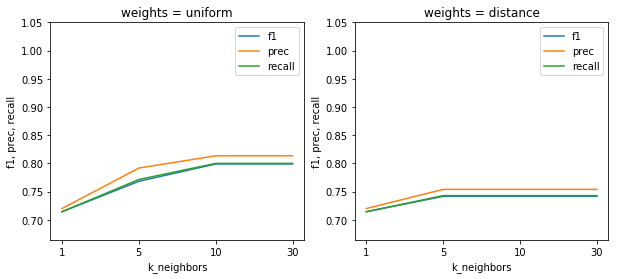

In [98]:
plt.figure(figsize=(10, 4))
i = 0
for weights in weights_list:
    plt.subplot(1,2,i+1)
    plt.plot(score[i*len(k_list):(i+1)*len(k_list),0])
    plt.plot(score[i*len(k_list):(i+1)*len(k_list),1])
    plt.plot(score[i*len(k_list):(i+1)*len(k_list),2])
    plt.xticks([0,1,2,3],k_list)
    plt.ylim(score[:,:3].min()-0.05, 1.05)
    plt.title("weights = %s" % weights)
    plt.legend(('f1', 'prec', 'recall'), loc='upper right')
    plt.xlabel("k_neighbors")
    plt.ylabel("f1, prec, recall")
    i = i + 1
plt.show()